In [10]:
import codecs
import re
from nltk.corpus import wordnet as wn

def getlabelSyn(syns):
    label_syn = []
    for syn in syns:
        if syn.pos() == 'n':
            wnid = syn.pos() + '%08d' % syn.offset()
            label_syn.append(wnid + ':' + syn.definition())
    return label_syn


f = open("./openimages/data_humman_des_valid.tsv", "r")
fw = codecs.open("./openimages/data_humman_des_deal.tsv", "wb", "utf8")
fmt = re.compile(ur'^n[0-9]{8}$')
fmt1 = re.compile(ur'^[s,v,a][0-9]{8}$')
fmt2 = re.compile(ur'^[A-Z]')
total = 0
c = 0

fw.write('WordnetID' + '\t' + 'count' + '\t' + 'Synsets' + '\t' + 'Definition' + '\n')
for line in f:
    labeID, cnt, labelName, wnID, des = line.split('\t')
    pos = wnID[0]
    off = wnID[1:]
    syn = wn._synset_from_pos_and_offset(pos,int(off))
    content = wnID + '\t' + cnt+ '\t' + ','.join(syn.lemma_names()) + '\t' + syn.definition() + '\n'
#     print content
    fw.write(content)
    
f.close()
fw.close()

In [11]:
f = open("./openimages/data_humman_des_deal.tsv", "r")
# fw = codecs.open("./openimages/data_humman_des_deal_uniq.tsv", "wb", "utf8")
cnt_dict = {}
for line in f:
    wnID, cnt, names, defi = line.split('\t')
    if wnID not in cnt_dict:
        cnt_dict[wnID] = 1
#         fw.write(line)
    else:
        cnt_dict[wnID] += 1
f.close()
# fw.close()
cnt = 0
num = 0
for item in cnt_dict.iteritems():
    if item[1] > 1:
        cnt += 1
        num += item[1]
        print item[0], item[1]
print cnt, num-cnt

n00451635 5
n07003119 2
n07555863 3
n02283201 2
n00467995 2
n03287733 2
n02084071 8
n04460130 2
n07202391 3
n02876657 2
n03790512 2
n02942699 4
n13001041 5
n12581381 2
n01726692 2
n04417809 2
n01905661 2
n02092468 2
n02743547 6
n00441824 2
n02686121 3
n04096066 3
n03790230 2
n03141065 2
n00463543 3
n00298497 2
n11939491 3
n03925226 2
n07745940 2
n00450700 2
n02274259 3
n04194289 4
n00283568 2
n01821203 2
n03792782 2
n03147509 2
n03800933 3
n10324560 2
n00293916 2
n03417345 2
n00122661 2
n02324045 2
n09619168 2
n00903559 5
n01846331 2
n02782093 3
n02924116 2
n00451370 7
n03459591 2
n02834778 6
n02121620 6
n04407435 7
n06998748 2
n08677628 2
n12620196 4
n03743902 2
n03933529 2
n07571324 2
n00449295 10
n08651247 2
n03381126 2
n00928077 4
n03354903 2
n04272054 2
n07881800 2
n09857200 2
n12752205 2
n02778669 2
n01097292 2
n07679356 2
n00445802 6
n02958343 31
n04199027 2
n04969798 3
n03346455 2
n09347779 2
n02512053 6
n04931965 3
n03904183 2
n11462526 2
n03100490 2
n03547054 2
n03316406 2
n1

去掉重复的wnid行

In [22]:
f = open("./openimages/data_humman_des_deal.tsv", "r")
fw = codecs.open("./openimages/data_humman_des_deal_uniq.tsv", "wb", "utf8")
cnt_dict = {}
wnid_names = {}
wnid_defi = {}
for line in f:
    wnID, cnt, names, defi = line.split('\t')
    if wnID == 'WordnetID':
        fw.write(line)
        continue
    if wnID not in cnt_dict:
        cnt_dict[wnID] = int(cnt)
        wnid_names[wnID] = names
        wnid_defi[wnID] = defi
    else:
        cnt_dict[wnID] += int(cnt)
        if wnid_names[wnID] != names:
            print 'error'
f.close()
num = 0
for wnID in cnt_dict.keys():
    num += 1
    cnt = cnt_dict[wnID]
    names = wnid_names[wnID]
    defi = wnid_defi[wnID]
    line = wnID + '\t' + str(cnt) + '\t' + names + '\t' + defi
    fw.write(line)
    
fw.close()
print num

1612


获取wnid_count字典

In [23]:
f = open("./openimages/data_humman_des_deal_uniq.tsv", "r")
cnt_dict = {}
for line in f:
    wnID, cnt, names, defi = line.split('\t')
    if wnID not in cnt_dict:
        cnt_dict[wnID] = cnt
    else:
        print 'error'
f.close()

测试是否有重复同义词组

In [15]:
f = open("./openimages/data_humman_des_deal_uniq1124.tsv", "r")
syn_set = {}
cnt = 0
for line in f:
    WordNetID,syns,Definition = line.split('\t')
    if syns == 'Synsets':
        continue
#     syns = syns.split(',')
#     syns.sort()
#     syns = ''.join(syns).strip(' ')
    if syns not in syn_set:
        syn_set[syns] = WordNetID
    else:
        print syns, syn_set[syns], WordNetID
        cnt += 1
print cnt

0


获取每个wnid的数量

In [31]:
f = open("./openimages/data_humman_des_deal_uniq1124.tsv", "r")
fw = codecs.open("./openimages/data_humman_des_deal_uniq_cnt.tsv", "wb", "utf8")
for line in f:
    WordNetID,syns,Definition = line.split('\t')
    if WordNetID == 'WordnetID':
#         fw.write(WordNetID + '\t' + 'count' + '\t' + syns + '\t' + Definition)
        continue
    content = WordNetID + '\t' + cnt_dict[WordNetID] + '\t' + syns + '\t' + Definition
    fw.write(content)
f.close()
fw.close()

排序

In [32]:
f = open("./openimages/data_humman_des_deal_uniq_cnt.tsv", "r")
fw = codecs.open("./openimages/data_humman_des_deal_uniq_cnt_sorted.tsv", "wb", "utf8")
sorted_lines = sorted(f, key=lambda line: int(line.split('\t')[1]), reverse=True)
for line in sorted_lines:
    wnid,cnt,syns,Definition = line.split('\t')
    fw.write(line)
f.close()
fw.close()

画图

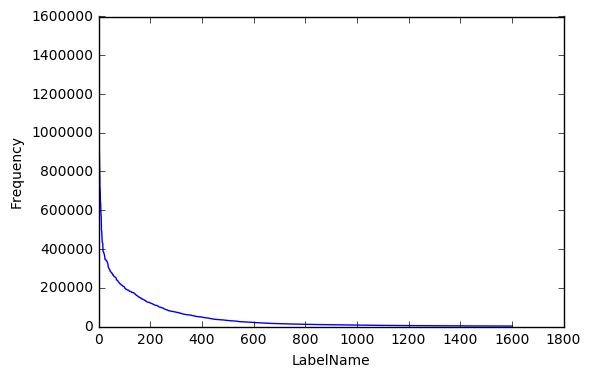

In [9]:
f = open("./openimages/data_humman_des_deal_uniq_cnt_sorted.tsv", "r")
cnts = []
for line in f.readlines():
    wnid,cnt,syns,Definition = line.split('\t')
    cnts.append(cnt)
f.close()
import matplotlib.pyplot as plt
import numpy as np
import codecs
fig = plt.figure(1)
x = [num for num in range(len(cnts))]
y = cnts
plt.xlabel('LabelName')
plt.ylabel('Frequency')
plt.plot(x, y)
plt.show()

f = open("./openimages/data_humman_des_deal_uniq_cnt_sorted.tsv", "r")
fw = codecs.open("./openimages/wnid_top1000.tsv", "wb", "utf8")
for line in f.readlines()[0:1000]:
    fw.write(line)
f.close()
fw.close()

获取ImageNet的ObjectDection任务的200Synset

In [11]:
f = open("./openimages/synset-200.txt", "r")
synsets_200 = set()
for line in f:
    url = line.split("\"")[1]
    wnid = url.split("=")[-1]
    synsets_200.add(wnid)
#     print wnid
f.close()

获取synset-3000synset

In [57]:
f = open("./openimages/synsets-3000.txt", "r")
fw = codecs.open("./openimages/synsets-3000-deal.txt", "wb", "utf8")
synsets_3000 = set()
for line in f:
    line_synsets = line.split(' ')
    for syns in line_synsets:
        wnid = syns.strip('\n')
        if wnid == '':
            continue
#         wnid = syns.replace('\n', '')
        print wnid
        synsets_3000.add(wnid)
        #fw.write(wnid+'\n')
#         synlist = syns.split('\t')
#         for wnid in synlist:
#             print wnid.strip('/').strip('\n')
#     synsets_3000.add(line_synsets)
f.close()
fw.close()

n00007846
n02230634
n02923129
n03612814
n04239074
n07736692
n00015388
n02231487
n02924116
n03612965
n04239333
n07737745
n00017222
n02233338
n02925385
n03613294
n04239436
n07739125
n00021265
n02236044
n02925666
n03614007
n04241394
n07739344
n00439826
n02243562
n02927161
n03614532
n04241573
n07742012
n00440039
n02243878
n02927764
n03615655
n04243546
n07742313
n00440941
n02244515
n02928608
n03617480
n04243941
n07742704
n00441824
n02247216
n02929289
n03618101
n04244997
n07743544
n00443692
n02256656
n02930766
n03618678
n04245218
n07743902
n00445351
n02259212
n02931417
n03619396
n04245508
n07744246
n00451186
n02262449
n02932019
n03619890
n04246731
n07744811
n00452293
n02264363
n02932400
n03621694
n04247011
n07745466
n00464894
n02268443
n02932523
n03623198
n04247736
n07745940
n00467719
n02268853
n02932693
n03623556
n04249415
n07746186
n00468480
n02270623
n02932891
n03624134
n04251144
n07747607
n00470966
n02274259
n02933112
n03627232
n04251701
n07748912
n00471613
n02274822
n02933340
n03630262


In [63]:
f = open("./openimages/data_humman_des_deal_uniq_cnt_sorted.tsv", "r")
fw = codecs.open("./openimages/synsets-1600-200.txt", "wb", "utf8")
fw2 = codecs.open("./openimages/synsets-1600-3000-r200.txt", "wb", "utf8")
contained_synset = 0
for line in f:
    wnid,cnt,words,des = line.split("\t")
    if wnid in synsets_200:
        #print wnid,words
        fw.write(line)
        contained_synset += 1
    else:
        if wnid in synsets_3000:
            fw2.write(line)
f.close()
fw.close()
fw2.close()
print contained_synset

54
